# The SciKit Learn (SkLearn) API

Scikit learn is an excellent repository of machine learning algorithms that are well-optimized, reliable, easy to work with in Python, and open source. The website is here: http://scikit-learn.org/stable/, but if you downloaded Anaconda, you already have SciKit Learn ready to go. SkLearn is built on numpy's functionalities, working with arrays and matrices as the main input. It's also Pandas compliant, so we can feed pandas dataframes into the SkLearn functions and it knows how to work with them. Basically, it's an extraordinarily convenient way to start into machine learning and data mining.

One of the best things about SkLearn is that the nomenclature for using is remarkably consistent. The API for calling functions is the same for every type of function. Let's talk about what that means and how it can be super useful, starting with an example.

First let's get some data to play with:

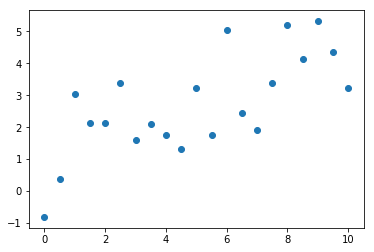

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw_inputs = np.linspace(0,10,21)
#np.linspace returns evenly spaced numbers over a given interval (start, stop, number of entries)
x = []
y = []
for val in raw_inputs:
    x.append(val)
    y.append(0.5*val + np.random.randn())
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
plt.scatter(x,y);

Now let's say we want to do regression on this data with SkLearn. Here are our steps

1. Import the type of regression we want to do from SkLearn.
2. Initialize the regression
3. Call the `fit` function of the module
4. If we want to predict new data, call the `predict` function.

And that's it. Let's see that in action, putting aside what a linear regression is trying to do, just focusing on the nomenclature.

In [9]:
from sklearn.linear_model import LinearRegression #import the regression called "LinearRegression"

In [12]:
lr = LinearRegression() # Initialize the model - you have to do this

In [14]:
lr.fit(x,y) # "Fit" the model, which means "I want you to learn from my data!"

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
new_x = np.array([1,10,100]).reshape(-1,1)
#-1 infers what the other dimension should look like. X, Y array
predicted_y = lr.predict(new_x) # Predict for new data!
print(predicted_y)

[[ 1.30037293]
 [ 4.48720266]
 [36.3555    ]]


That's it! That's pretty much the pipeline for the SkLearn API. There are a few other things we'll touch on in a bit - but the main point is that this is the normal pipeline. Let's see it in action for a different type of regression called "Lasso" Regression.

In [17]:
from sklearn.linear_model import Lasso
#Lasso model combats overfitting, which is typical of ML models

In [18]:
lr = Lasso() # Initialize the model

In [19]:
lr.fit(x,y) # "Fit" the model, which means "I want you to learn from my data!"

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
new_x = np.array([1,10,100]).reshape(-1,1)
predicted_y = lr.predict(new_x) # Predict for new data!
print(predicted_y)

[ 1.73673656  3.94174812 25.99186364]


Hopefully after our discussion of Python yesterday, you're thinking, that looks like it could be a function... and you're right! Therein lies one of the greatest strengths of the SkLearn API... if everything uses the same nomenclature, it's very easy to swap models in and out.

In [26]:
def do_regression(model, x, y, new_x):
    model.fit(x,y)
    ypred = model.predict(new_x)
    return ypred
#new_x defined in array form above

do_regression(Lasso(alpha=0.5, fit_intercept=False), x, y, new_x)
#alpha - parameters for Lasso - alpha is kind of important for the fitting

array([[ 0.47793815],
       [ 4.77938154],
       [47.79381539]])

In [28]:
do_regression(LinearRegression(), x, y, new_x)

array([[ 1.30037293],
       [ 4.48720266],
       [36.3555    ]])

Let's take a minute to focus on some of the naming conventions that come up a lot:

* The LinearRegression() or Lasso() is a model. We're trying to build models for the data
* The 'fit' is often called "training" the model
* You'll also see discussions of 'test data', which you often use with the 'predict' call to test your model. We'll get more into that in the deeper regression discussion.


## How to read the Sklearn Documentation

Let's go through the documentation for this page: 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

<img src="./images/skl_docu1.png">

This introduces us to the type of model we're going to use and also tells us how to import it. Here are the key things to look for:

* We know that it's under the heading sklearn.linear_model.
* We see right away that there are lots of settings we can update with Kwargs (alpha, fit_intercept, normalize, etc.). All of those are things we can adjust to make our models perform how we want them to (you'll sometimes see these called 'hyperparameters.' More on that later)
* If we are interested, there's then a blurb about what the model is actually doing. In this case, it tells us all about the function it's optimizing.

Now let's look at what it tells us about the Kwargs:

<img src="./images/skl_docu2.png">

Here, it's describing what each of those things we can adjust actually does. For instance, it tells us that alpha adjusts the 'L1' terms. We're not going to worry what that is right now, but suffice it to say, this allows us to adjust how strong some components of our model are. It also has "fit_intercept" that let's us choose how the linear regression is going to work. All of these describe inputs to the model.

Now let's look at some outputs:

<img src="./images/skl_docu3.png">

This section describes to us some of the attributes associated with the model. So for instance, we know that linear regression is trying to find a line... so it should have a formula like `y = coefficient * x + intercept`. Once we've trained our model, we can find these by looking at the attributes like so:

In [29]:
print (lr.coef_,lr.intercept_)

[0.24500128] [1.49173528]


Now let's take a look at output methods:

<img src="./images/skl_docu4.png">

In [ ]:
#score gives R Squared

This section shows us what functions we can call on our model. So we already know about `fit` and `predict` but there are also other useful things like `score` which can show us how well our model is doing. We'll see how to use that in a bit. Deeper discussions of each function can be seen below that section, showing what types of inputs the functions need (see the `fit` example that talks about need X and Y to learn).

<img src="./images/skl_docu5.png">

## Some important methods besides fit and predict

### Score

Let's get some more data to test our model using the `score` method. This data will have a similar build, but the randomness means it won't be the same as our previous data.

In [34]:
raw_inputs = np.linspace(0,10,11)
test_x = []
test_y = []
for val in raw_inputs:
    test_x.append(val)
    test_y.append(0.5*val + np.random.randn())
test_x = np.array(test_x).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)

Now let's use score to get the R^2 (don't worry too much about about R^2, we'll get to it)

In [35]:
lr.score(test_x,test_y) # This model isn't very good yet...
#score is not always R Squared - depends on the model

0.6628946200864891

Score doesn't always return R^2, it depends on the model, so you'll have to check the documentation to see what it does return for each model type. However, it always returns some sort of value that tells you whether your model is behaving well or not.

### Transform

This is another method that comes up a lot, though not in linear regression. We'll look at it in terms of a thing called PCA ( http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA ). 

We'll not be talking about PCA today, but this will show you how transform can work. In this case, the PCA takes the input, learns about the data, then we use transform to shift the data into a different set of coordinates. 

In [36]:
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca_x = pca.transform(X)
print(pca_x)

[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


These are all the same data points, but we've transformed how we identify them. You might also see it done like this for data where you're learning and transforming on the same dataset:

In [38]:
pca_x2 = pca.fit_transform(X)
print(pca_x2)

[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


# Let's see some examples (stolen shamelessly from SkLearn's tutorials)

This first section just gets some data to look at. This is a pretty famous toy dataset called the "Iris" dataset which is a measurement of features of flowers, which allows us to guess the type of (iris) flower.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Now the good stuff:

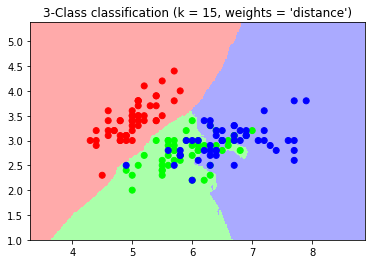

In [41]:
#### Spawn the model with some parameter set!
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') 
#K nearest neighbors - KNeighborsClassifier - initializing KNeighborsClassifier as clf

#### Fit the model!
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

### Use predict on literally every point in the plot to see what class we think it is!
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 


##### Just making the plots after this point

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, clf.weights));

** What about something more complicated like handwriting recognition? Same pipeline, just more data wrangling to get everything ready to go. **

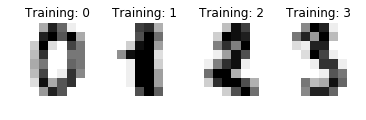

In [42]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

All of that was just to get the data into a format we can work with. So now it's in a format like x = [pixel_0's strength, pixel_1's strength, pixel_2' strength,...] and y = [this is a 3].

Now we spawn our model (called SVC this time, again don't worry much about what an SVC is now, but the documentation is here:

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Then we train it on the first half of our data using fit().

In [43]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

This whole section is just looking at how good our model is. At this point, our model is built already and we can just see how we did!

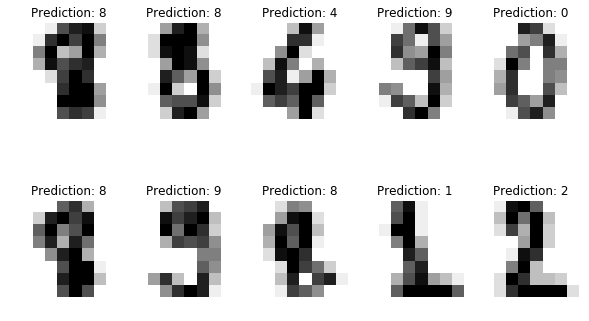

In [44]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
plt.figure(figsize=(10,6))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()